## Testing coord system and multiple file merging
With U wind

In [1]:
# Libraries
%load_ext autoreload
%autoreload


import numpy as np
import iris
import iris.coord_categorisation
from iris.util import unify_time_units
from iris.experimental.equalise_cubes import equalise_attributes
import iris.quickplot as qplt
import iris.coord_categorisation
# import pandas as pd

import glob
import sys
sys.path.append('../')
from libs.plot_maps import *


import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy.ma as ma
%matplotlib inline
import cartopy.crs as ccrs

/home/meganbrown/miniconda3/envs/uvis_env/lib/python3.6/site-packages/dask/config.py:131: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


### Loading in data

In [45]:
path     = '../data/aus_wind/'
path_out = '../data/aus_wind/'

years = range(2001, 2010)
u_files = []
v_files = []
for year in years:
    u_files.append(path + 'uwnd.10m.gauss.' + str(year) + '.nc')
    v_files.append(path + 'vwnd.10m.gauss.' + str(year) + '.nc')
    
uList = []
vList = []

# Just loading in files from 2001-3 atm. Remove [0:3] for all files
for i in u_files[0:3]:
    dfu = iris.load_cube(i)
    dfu.coord('time').attributes = {}
    uList.append(dfu)
    

for j in v_files[0:3]:
    dfv = iris.load_cube(j)
    dfv.coord('time').attributes = {}
    vList.append(dfv)
    
    
u_cube_list = iris.cube.CubeList(uList)
v_cube_list = iris.cube.CubeList(vList)

In [3]:
# Mask load 
path_mask = '../data/climate/'
file_mask = 'climate_mask.nc'

mask = iris.load_cube(path_mask + file_mask)

### Concatenate cubes

In [50]:
# Equalise attributes so they can combine
equalise_attributes(u_cube_list)
unify_time_units(u_cube_list)

u = u_cube_list.concatenate_cube()
print(u)

4xDaily u-wind at 10 m / (m/s)      (time: 4380; latitude: 94; longitude: 192)
     Dimension coordinates:
          time                           x               -              -
          latitude                       -               x              -
          longitude                      -               -              x
     Auxiliary coordinates:
          day_of_year                    x               -              -
          month                          x               -              -
          year                           x               -              -
     Attributes:
          Conventions: COARDS
          GRIB_id: 33
          GRIB_name: U GRD
          References: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html
          dataset: NCEP Reanalysis
          dataset_title: NCEP-NCAR Reanalysis 1
          description: Data is from NMC initialized reanalysis
(4x/day).  It consists of T62 variables...
          least_significant_digit: 1
         

### Plot data

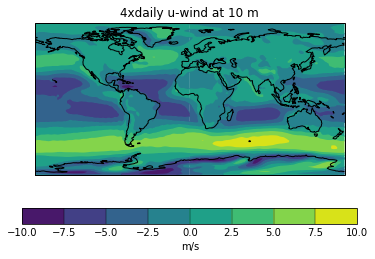

In [52]:
# Normal data
norm_dat = u.collapsed('time', iris.analysis.MEAN)
qplt.contourf(norm_dat)
plt.gca().coastlines()

In [46]:
for i in range(len(u_cube_list)):
    try:
        iris.coord_categorisation.add_month(u_cube_list[i], 'time', name='month')
        iris.coord_categorisation.add_day_of_year(u_cube_list[i], 'time', name='day_of_year')
        iris.coord_categorisation.add_year(u_cube_list[i], 'time', name='year')
        print(i)
    except:
        pass

0
1
2


### Coord system
Creating the coordinates, which may not be need

In [35]:
# lat = u_cube_list[0].coord('latitude').points
# lon = u_cube_list[0].coord('longitude').points

# # Dim coord for latitude (index: 1)
# coord_lat = iris.coords.DimCoord(lat, standard_name='latitude',
#                                  coord_system=iris.coord_systems.GeogCS(6371229.0),var_name='latitude',
#                                  units='degrees')

# # Dim coord for longitude (index: 2)
# coord_lon = iris.coords.DimCoord(lon, standard_name='longitude',
#                                  coord_system=iris.coord_systems.GeogCS(6371229.0),var_name='longitude',
#                                  units='degrees')

Adding these coords to data

In [36]:
# for key in range(len(u_cube_list)):
#     try:
#         u_cube_list[key].remove_coord('latitude')
#         u_cube_list[key].remove_coord('longitude')
    
#         # Adding dimension coordinates to data
#         u_cube_list[key].add_dim_coord(coord_lat, 1)
#         u_cube_list[key].add_dim_coord(coord_lon, 2)
#         print(key)
#     except:
#         pass

0
1
2
